In [213]:
!pip install Keras-Preprocessing

In [214]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re,json,nltk
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import numpy as np
from tensorflow import keras
from keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers, optimizers
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import LSTM,Dense,Embedding,SpatialDropout1D
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import  confusion_matrix
import seaborn
from sklearn.feature_extraction.text import CountVectorizer
import plotly as py
import cufflinks as cf
import tensorflow
from tensorflow.keras import Sequential
from plotly.offline import iplot
py.offline.init_notebook_mode(connected=True)
cf.go_offline()
from tensorflow.keras.layers import Bidirectional, GlobalMaxPool1D, Dense, LSTM, Conv1D, Embedding
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
import keras
import tensorflow
from tensorflow.keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences as pad
from sklearn.preprocessing import LabelEncoder
import re
import pickle
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score

from keras.models import Sequential
from keras.layers import LSTM,Dense,Embedding,SpatialDropout1D
from keras_preprocessing.sequence import pad_sequences as pad
from keras_preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
!pip install git+https://github.com/paulgavrikov/visualkeras
import visualkeras
from sklearn.metrics import  confusion_matrix
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

  Cloning https://github.com/paulgavrikov/visualkeras to /tmp/pip-req-build-4ik7oc7l
  Running command git clone --filter=blob:none --quiet https://github.com/paulgavrikov/visualkeras /tmp/pip-req-build-4ik7oc7l
  Resolved https://github.com/paulgavrikov/visualkeras to commit cd169b81be347e2090353ad6fe2bd2e1f4020cf4
  Preparing metadata (setup.py) ... done


In [215]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Directory for Mam**

In [216]:
# df=pd.read_csv("/content/drive/MyDrive/MY RESEARCH/EMNLP/Dataset/blp23_sentiment_train.csv")

In [217]:
# file_path="/content/drive/MyDrive/MY RESEARCH/EMNLP/Dataset/blp23_sentiment_train.csv"

# **Directory for Rajesh**

In [218]:
file_path="/content/drive/MyDrive/Research Work/EMNLP/Dataset2/blp23_sentiment_train.csv"

In [219]:
df=pd.read_csv("/content/drive/MyDrive/Research Work/EMNLP/Dataset2/blp23_sentiment_train.csv")

In [220]:
df.head()

,id,text,label
0,10856,এখানে আরো ভালো ভাবে দলীয় ও র এর অবস্থান পাকা হ...,Neutral
1,sentinob_1072,চুয়াডাঙ্গা বাড়ি কে বলেছে আপনার,Neutral
2,sentinob_10530,"ভাই সোনাই ঘোষ এর দই খেয়ে যাইতেন , খুব ই মজার",Positive
3,8001,সমার তালুকদার আপনার ছবিতে ফেসটা কেন জানি বন্য ...,Negative
4,sentinob_10144,ভাইয়া এই নুডলস টা কোথায় কিনতে পাওয়া যাবে প্লিজ...,Positive


In [221]:
df.shape

(35266, 3)

In [222]:
print("Total Comment:",len(df),
      "\nTotal Negative :",len(df[df.label =='Negative']),
      "\nTotal Neutral :",len(df[df.label =='Neutral']),
      "\nTotal Positive :",len(df[df.label=='Positive']))

Total Comment: 35266 
Total Negative : 15767 
Total Neutral : 7135 
Total Positive : 12364


My Data is not Label, Now I want to Label My Data using sampling

In [223]:
# category_list=df.label.unique()
# category_list

# for i in category_list:
#     temp=df.loc[df['label'] == str(i)]
#     #display(temp)
#     temp['temp_list'] = df['text'].apply(lambda x:str(x).split())
#     top = Counter([item for sublist in temp['temp_list'] for item in sublist])
#     temp = pd.DataFrame(top.most_common(500000))
#     temp.columns = ['Common_words','count']
#     generate_wordcloud(temp,str(i))

# **Remove Duplicates**

In [224]:
df.shape

(35266, 3)

In [225]:
df.drop_duplicates(inplace=True)

In [226]:
df.shape

(35266, 3)

Here Are no duplicate values

# **In this section I want to check null value**

In [227]:
df.isnull().sum()

id       0
text     0
label    0
dtype: int64

# **Remove Small Text and Long Text**

In [228]:
df['no_char'] = df['text'].apply(lambda Sentence: len(Sentence))

In [229]:
df['length'] = df['text'].apply(lambda x:len(x.split()))

In [230]:
dataset = df.loc[df.length>6]
dataset = dataset.reset_index(drop = True)
print("After Cleaning:","\nRemoved {} Small conversations".format(len(df)-len(dataset)),
      "\nTotal conversations:",len(dataset))

After Cleaning: 
Removed 6623 Small conversations 
Total conversations: 28643


In [231]:
dataset.shape

(28643, 5)

In [232]:
newdf = dataset.loc[dataset['length'] <= 30]
newdf = newdf.reset_index(drop = True)
print("After Cleaning:","\nRemoved {} Big conversations".format(len(dataset)-len(newdf)),
      "\nTotal conversations:",len(newdf))

After Cleaning: 
Removed 3053 Big conversations 
Total conversations: 25590


In [233]:
newdf.shape

(25590, 5)

In [234]:
df=newdf.copy()

In [235]:
df.shape

(25590, 5)

In [236]:
df.head()

,id,text,label,no_char,length
0,10856,এখানে আরো ভালো ভাবে দলীয় ও র এর অবস্থান পাকা হ...,Neutral,56,14
1,sentinob_10530,"ভাই সোনাই ঘোষ এর দই খেয়ে যাইতেন , খুব ই মজার",Positive,45,11
2,8001,সমার তালুকদার আপনার ছবিতে ফেসটা কেন জানি বন্য ...,Negative,75,15
3,sentinob_10144,ভাইয়া এই নুডলস টা কোথায় কিনতে পাওয়া যাবে প্লিজ...,Positive,57,11
4,29871,বাংলাদেশে ফেসবুক ডট কম ডট বিডি ডোমেইন ব্যবহারে...,Negative,57,9


# **Below I have cleaned my dataset (Puncuation,links, emoji, non-character)**

In [237]:
import pandas as pd
import regex as re

def remove_non_bengali_characters(sentence):
    cleaned_sentence = re.sub(r'\P{Bengali}+', ' ', sentence)
    return cleaned_sentence.strip()

In [238]:
import pandas as pd
import regex as re

def remove_bengali_numerical(sentence):
    bengali_numerals_pattern = r'[০-৯]+'
    cleaned_sentence = re.sub(bengali_numerals_pattern, '', sentence)

    return cleaned_sentence.strip()

In [239]:
df['Sentences'] = df['text'].apply(remove_non_bengali_characters)

In [240]:
df['Sentences'] = df['Sentences'].apply(remove_bengali_numerical)

In [241]:
df.drop(["id","no_char","text"],axis=1,inplace=True)

In [242]:
df.head()

,label,length,Sentences
0,Neutral,14,এখানে আরো ভালো ভাবে দলীয় ও র এর অবস্থান পাকা হ...
1,Positive,11,ভাই সোনাই ঘোষ এর দই খেয়ে যাইতেন খুব ই মজার
2,Negative,15,সমার তালুকদার আপনার ছবিতে ফেসটা কেন জানি বন্য ...
3,Positive,11,ভাইয়া এই নুডলস টা কোথায় কিনতে পাওয়া যাবে প্লিজ...
4,Negative,9,বাংলাদেশে ফেসবুক ডট কম ডট বিডি ডোমেইন ব্যবহারে...


In [243]:
import re

# Define a regular expression pattern to match Bengali characters and spaces
bengali_pattern = re.compile("[\u0980-\u09FF ]+")

# Function to remove non-Bengali characters from a string
def remove_non_bengali_chars(text):
    return "".join(filter(bengali_pattern.match, text))

# Apply the function to each element in your dataset
df['Bengali_Text'] = df['Sentences'].apply(remove_non_bengali_chars)


In [244]:
df.drop(["Sentences","length"],axis=1,inplace=True)

In [245]:
df.head()

,label,Bengali_Text
0,Neutral,এখানে আরো ভালো ভাবে দলীয় ও র এর অবস্থান পাকা হ...
1,Positive,ভাই সোনাই ঘোষ এর দই খেয়ে যাইতেন খুব ই মজার
2,Negative,সমার তালুকদার আপনার ছবিতে ফেসটা কেন জানি বন্য ...
3,Positive,ভাইয়া এই নুডলস টা কোথায় কিনতে পাওয়া যাবে প্লিজ...
4,Negative,বাংলাদেশে ফেসবুক ডট কম ডট বিডি ডোমেইন ব্যবহারে...


# **Remove Stopwords**

# **This Directory for mam**

In [246]:
# def process_conversations(Conversation):
#     stp = open('/content/drive/MyDrive/MY RESEARCH/EMNLP/Dataset/Stopwords.txt','r',encoding="utf8").read().split()
#     result = Conversation.split()
#     Conversation = [word.strip() for word in result if word not in stp ]
#     Conversation =" ".join(Conversation)
#     Conversation = re.sub('[^\u0980-\u09FF]',' ',str(Conversation))
#     return Conversation

In [247]:
# df['cleaned'] = df['Bengali_Text'].apply(process_conversations)
# sample_data = [10,400]
# for i in sample_data:
#      print('Original:\n',df.Bengali_Text[i],'\nCleaned:\n',
#            df.cleaned[i],'\n','Detected as:-- ',df.label[i],'\n')

In [248]:
def process_conversations(Conversation):
    stp = open('/content/drive/MyDrive/Research Work/EMNLP/Dataset2/Stopwords.txt','r',encoding="utf8").read().split()
    result = Conversation.split()
    Conversation = [word.strip() for word in result if word not in stp ]
    Conversation =" ".join(Conversation)
    Conversation = re.sub('[^\u0980-\u09FF]',' ',str(Conversation))
    return Conversation

In [249]:
df['cleaned'] = df['Bengali_Text'].apply(process_conversations)
sample_data = [10,400]
for i in sample_data:
     print('Original:\n',df.Bengali_Text[i],'\nCleaned:\n',
           df.cleaned[i],'\n','Detected as:-- ',df.label[i],'\n')

Original:
 এখানে হিন্দুদের পড়া শোনার কথা হচ্ছে না হচ্ছে ছেলে মেয়ে একসাথে পড়াশোনার কথা 
Cleaned:
 হিন্দুদের পড়া শোনার কথা ছেলে মেয়ে একসাথে পড়াশোনার কথা 
 Detected as:--  Neutral 

Original:
 কাফফারা দিতে হবে আমার মত রোজাদারদের স্টারে একটা ট্রিট 
Cleaned:
 কাফফারা মত রোজাদারদের স্টারে একটা ট্রিট 
 Detected as:--  Positive 



In [250]:
df.head()

,label,Bengali_Text,cleaned
0,Neutral,এখানে আরো ভালো ভাবে দলীয় ও র এর অবস্থান পাকা হ...,আরো ভালো দলীয় অবস্থান পাকা
1,Positive,ভাই সোনাই ঘোষ এর দই খেয়ে যাইতেন খুব ই মজার,ভাই সোনাই ঘোষ দই খেয়ে যাইতেন মজার
2,Negative,সমার তালুকদার আপনার ছবিতে ফেসটা কেন জানি বন্য ...,সমার তালুকদার ছবিতে ফেসটা জানি বন্য বন্য লাগতে...
3,Positive,ভাইয়া এই নুডলস টা কোথায় কিনতে পাওয়া যাবে প্লিজ...,ভাইয়া নুডলস টা কোথায় কিনতে পাওয়া প্লিজ একটু বলবেন
4,Negative,বাংলাদেশে ফেসবুক ডট কম ডট বিডি ডোমেইন ব্যবহারে...,বাংলাদেশে ফেসবুক ডট কম ডট বিডি ডোমেইন ব্যবহারে...


# **Stemming**

In [251]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

def stemming (text):
    return ''.join([stemmer.stem(word) for word in text])

df['cleaned']=df['cleaned'].apply(stemming)
df.head()

,label,Bengali_Text,cleaned
0,Neutral,এখানে আরো ভালো ভাবে দলীয় ও র এর অবস্থান পাকা হ...,আরো ভালো দলীয় অবস্থান পাকা
1,Positive,ভাই সোনাই ঘোষ এর দই খেয়ে যাইতেন খুব ই মজার,ভাই সোনাই ঘোষ দই খেয়ে যাইতেন মজার
2,Negative,সমার তালুকদার আপনার ছবিতে ফেসটা কেন জানি বন্য ...,সমার তালুকদার ছবিতে ফেসটা জানি বন্য বন্য লাগতে...
3,Positive,ভাইয়া এই নুডলস টা কোথায় কিনতে পাওয়া যাবে প্লিজ...,ভাইয়া নুডলস টা কোথায় কিনতে পাওয়া প্লিজ একটু বলবেন
4,Negative,বাংলাদেশে ফেসবুক ডট কম ডট বিডি ডোমেইন ব্যবহারে...,বাংলাদেশে ফেসবুক ডট কম ডট বিডি ডোমেইন ব্যবহারে...


In [252]:
df.drop("Bengali_Text",axis=1,inplace=True)

In [253]:
print("Total Comment:",len(df),
      "\nTotal Negative :",len(df[df.label =='Negative']),
      "\nTotal Neutral :",len(df[df.label =='Neutral']),
      "\nTotal Positive :",len(df[df.label=='Positive']))

Total Comment: 25590 
Total Negative : 11567 
Total Neutral : 4775 
Total Positive : 9248


In [254]:
from wordcloud import WordCloud
from textwrap import wrap
from collections import Counter

import matplotlib.pyplot as plt
from matplotlib import font_manager

# Function for generating word clouds
def generate_wordcloud(data,title):
  data = [tuple(x) for x in data.values]
  wc = WordCloud(font_path="/content/drive/MyDrive/Simple Complex Compound/Font/kalpurush-2.ttf",width=1080, height=720, max_words=150,colormap="Dark2").generate_from_frequencies(dict(data))
  plt.figure(figsize=(10,8))
  plt.imshow(wc, interpolation='bilinear')
  plt.axis("off")
  plt.title('\n'.join(wrap("Word Cloud of "+title,60)),fontsize=13)
  plt.show()

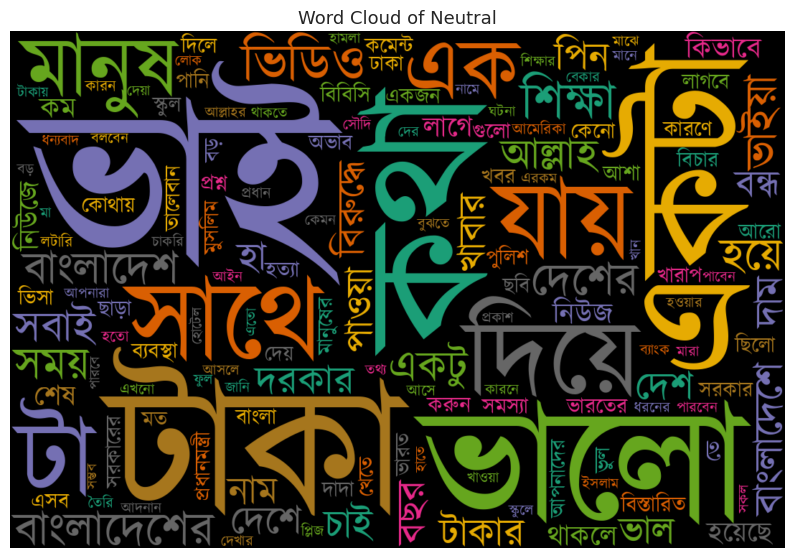

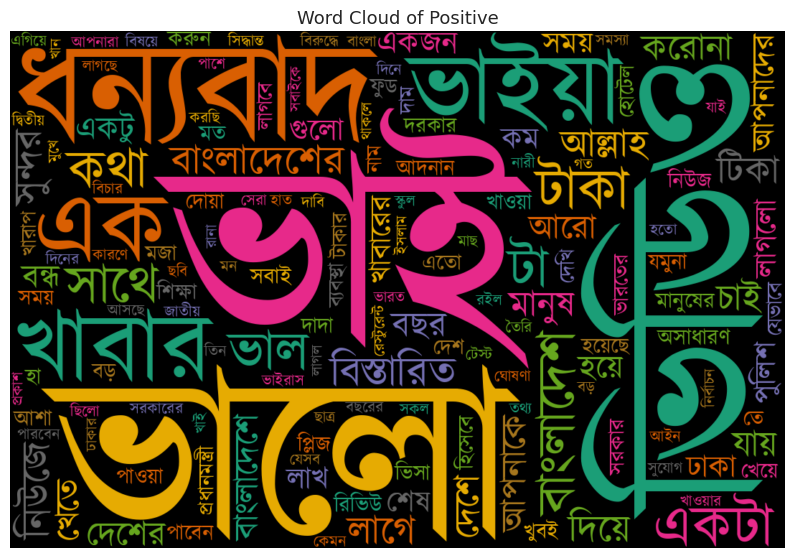

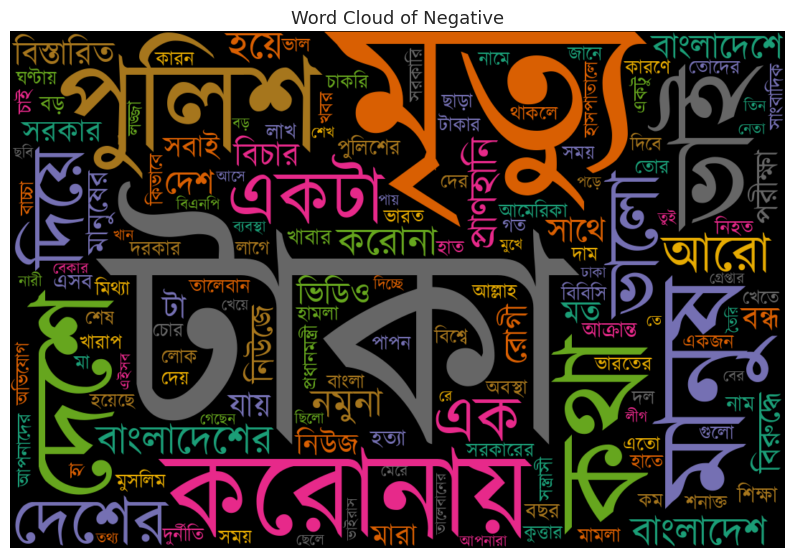

In [255]:
category_list=df.label.unique()
category_list

for i in category_list:
    temp=df.loc[df['label'] == str(i)]
    #display(temp)
    temp['temp_list'] = df['cleaned'].apply(lambda x:str(x).split())
    top = Counter([item for sublist in temp['temp_list'] for item in sublist])
    temp = pd.DataFrame(top.most_common(500000))
    temp.columns = ['Common_words','count']
    generate_wordcloud(temp,str(i))

# **My Data is not Labeled That's why I am going to Augment my Neutral Data**

In [43]:
df.head()

,label,cleaned
0,Neutral,আরো ভালো দলীয় অবস্থান পাকা
1,Positive,ভাই সোনাই ঘোষ দই খেয়ে যাইতেন মজার
2,Negative,সমার তালুকদার ছবিতে ফেসটা জানি বন্য বন্য লাগতে...
3,Positive,ভাইয়া নুডলস টা কোথায় কিনতে পাওয়া প্লিজ একটু বলবেন
4,Negative,বাংলাদেশে ফেসবুক ডট কম ডট বিডি ডোমেইন ব্যবহারে...


In [44]:
# !pip install bangla-stemmer

In [45]:
# from bangla_stemmer.stemmer import stemmer
# import pandas as pd
# def augment_neutral_data(text):
#     stmr = stemmer.BanglaStemmer()
#     augmented_text = stmr.stem(text)
#     return augmented_text
# neutral_data = df[df['label'] == 'Neutral']['cleaned']
# augmented_neutral_data = neutral_data.apply(augment_neutral_data)
# augmented_df = pd.DataFrame({'cleaned': augmented_neutral_data, 'label': 'Neutral'})
# # Concatenate the augmented data with the original DataFrame
# augmented_df = pd.concat([df, augmented_df], ignore_index=True)

# print(augmented_df)

In [46]:
# df=augmented_df.copy()

In [47]:
print("Total Comment:",len(df),
      "\nTotal Negative :",len(df[df.label =='Negative']),
      "\nTotal Neutral :",len(df[df.label =='Neutral']),
      "\nTotal Positive :",len(df[df.label=='Positive']))

Total Comment: 25590 
Total Negative : 11567 
Total Neutral : 4775 
Total Positive : 9248


In [48]:
def label_encoding(df,bool):
  le = LabelEncoder()
  le.fit(df.label)
  encoded_labels = le.transform(df.label)
  labels = np.array(encoded_labels) # Converting into numpy array
  class_names =le.classes_ ## Define the class names again
  if bool == True:
    print(color.BOLD+"\n\t\t\t===== Label Encoding ====="+color.END,"\nClass Names:-->",le.classes_)
  return labels

def dataset_split(news,Label):
  '''
  This function will split the dataset into Train-Test-Validation set
  '''

  X,X_test,y,y_test = train_test_split(news,Label,train_size = 0.8,
                                                  test_size = 0.2,random_state =0)
  X_train,X_valid,y_train,y_valid = train_test_split(X,y,train_size = 0.8,
                                                  test_size = 0.2,random_state =0)
  print(color.BOLD+"Feature Size :======>"+color.END,X_train.shape[1])
  print(color.BOLD+"\nDataset Distribution:\n"+color.END)
  print("\tSet Name","\t\tSize")
  print("\t========\t\t======")

  print("\tFull\t\t\t",news.shape[0],
        "\n\tTraining\t\t",X_train.shape[0],
        "\n\tTest\t\t\t",X_test.shape[0],
        "\n\tValidation\t\t",X_valid.shape[0])

  return X_train,X_valid,X_test,y_train,y_valid,y_test

In [49]:
class color: # Text style
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [50]:
def encoded_texts(dataset,padding_length,max_words):

  tokenizer = Tokenizer(num_words = max_words, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~\t\n-',
                      split=' ', char_level=False, oov_token='', document_count=0)
  tokenizer.fit_on_texts(df.cleaned)
  (word_counts,word_docs,word_index,document_count) = (tokenizer.word_counts,
                                                       tokenizer.word_docs,
                                                       tokenizer.word_index,
                                                       tokenizer.document_count)
  def tokenizer_info(mylist,bool):
    ordered = sorted(mylist.items(), key= lambda item: item[1],reverse = bool)
    for w,c in ordered[:10]:
      print(w,"\t",c)
  print(color.BOLD+"\t\t\t====== Tokenizer Info ======"+color.END)
  print("Words --> Counts:")
  tokenizer_info(word_counts,bool =True )
  print("\nWords --> Documents:")
  tokenizer_info(word_docs,bool =True )
  print("\nWords --> Index:")
  tokenizer_info(word_index,bool =True )
  print("\nTotal Documents -->",document_count)

  #=========================== Convert string into list of integer indices =================
  sequences = tokenizer.texts_to_sequences(df.cleaned)
  word_index = tokenizer.word_index
  print(color.BOLD+"\n\t\t\t====== Encoded Sequences ======"+color.END,"\nFound {} unique tokens".format(len(word_index)))
  print(df.cleaned[10],"\n",sequences[10])

  #==================================== Pad Sequences ==============================
  corpus = pad(sequences, value=0.0,
                                                      padding='post', maxlen= padding_length)
  print("\n\t\t\t====== Paded Sequences ======\n",df.cleaned[10],"\n",corpus[10])

  #=================================     Label Encoding ================================
  labels = label_encoding(df,True)

   # save the tokenizer into a pickle file
  with open(file_path+'tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

  return corpus,labels

#call the function
num_words = 5000
corpus,labels = encoded_texts(df,
                                300,num_words)
print("\nShape of Encoded Corpus =====>",corpus.shape)

			====== Tokenizer Info ======
Words --> Counts:
ভাই 	 1602
ভালো 	 1170
টাকা 	 1001
কথা 	 922
একটা 	 788
ভিডিও 	 761
মানুষ 	 713
এক 	 689
দিয়ে 	 646
পুলিশ 	 639

Words --> Documents:
ভাই 	 1516
ভালো 	 1081
টাকা 	 882
কথা 	 872
একটা 	 750
মানুষ 	 688
ভিডিও 	 686
এক 	 663
দিয়ে 	 618
সাথে 	 581

Words --> Index:
গণধ 	 39415
র্যাতন 	 39414
সমঝোতায় 	 39413
খাদ্যগুদাম 	 39412
স্ট্যান্ড 	 39411
কলঙ্কের 	 39410
মারোয়াড়ী 	 39409
ঘুমে 	 39408
সিডিসি 	 39407
মারকানা 	 39406

Total Documents --> 25590

			====== Encoded Sequences ====== 
Found 39415 unique tokens
হিন্দুদের পড়া শোনার কথা ছেলে মেয়ে একসাথে পড়াশোনার কথা 
 [1319, 2105, 2777, 5, 204, 1579, 872, 1, 5]

			====== Paded Sequences ======
 হিন্দুদের পড়া শোনার কথা ছেলে মেয়ে একসাথে পড়াশোনার কথা 
 [1319 2105 2777    5  204 1579  872    1    5    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0

In [51]:
#Call Dataset Split Function
X_train,X_valid,X_test,y_train,y_valid,y_test = dataset_split(corpus,labels)

Feature Size :======> 300

Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 25590 
	Training		 16377 
	Test			 5118 
	Validation		 4095


In [52]:
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
callbacks = [ReduceLROnPlateau(monitor='val_loss', patience=5, cooldown=0),
             EarlyStopping(monitor='val_accuracy', min_delta=1e-4, patience=5)]

In [53]:
max_fatures = 500
tokenizer = Tokenizer(num_words=max_fatures, split=' ')
tokenizer.fit_on_texts(df['cleaned'].values)
X = tokenizer.texts_to_sequences(df['cleaned'].values)
X = pad_sequences(X)

In [54]:
import tensorflow as tf
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

embedding_dimension = 128
input_length = 300
vocab_size = 5000
num_classes = 3
batch_size = 64
num_epochs = 150

# Calculate class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)

model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dimension, input_length=input_length),
    tf.keras.layers.MaxPooling1D(5),
    tf.keras.layers.LSTM(64, return_sequences=True, dropout=0.2),
    tf.keras.layers.Dense(28, activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

model.summary()

model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 300, 128)          640000    
                                                                 
 max_pooling1d (MaxPooling1D  (None, 60, 128)          0         
 )                                                               
                                                                 
 lstm (LSTM)                 (None, 60, 64)            49408     
                                                                 
 dense (Dense)               (None, 60, 28)            1820      
                                                                 
 flatten (Flatten)           (None, 1680)              0         
                                                                 
 dense_1 (Dense)             (None, 3)                 5043      
                                                        

In [55]:
# Train the model with class weights
history=model.fit(
    X_train, y_train,
    class_weight=dict(enumerate(class_weights)),
    batch_size=batch_size,
    epochs=50,
    validation_data=(X_valid, y_valid)
)

Epoch 1/50
256/256 [==============================] - 34s 96ms/step - loss: 1.0485 - accuracy: 0.4033 - val_loss: 0.9387 - val_accuracy: 0.5524
Epoch 2/50
256/256 [==============================] - 5s 21ms/step - loss: 0.8176 - accuracy: 0.6429 - val_loss: 0.9262 - val_accuracy: 0.5690
Epoch 3/50
256/256 [==============================] - 4s 17ms/step - loss: 0.6138 - accuracy: 0.7456 - val_loss: 0.9255 - val_accuracy: 0.5897
Epoch 4/50
256/256 [==============================] - 4s 14ms/step - loss: 0.4538 - accuracy: 0.8185 - val_loss: 1.0955 - val_accuracy: 0.5604
Epoch 5/50
256/256 [==============================] - 4s 16ms/step - loss: 0.3341 - accuracy: 0.8715 - val_loss: 1.3058 - val_accuracy: 0.5868
Epoch 6/50
256/256 [==============================] - 3s 11ms/step - loss: 0.2483 - accuracy: 0.9045 - val_loss: 1.5085 - val_accuracy: 0.5976
Epoch 7/50
256/256 [==============================] - 5s 18ms/step - loss: 0.1950 - accuracy: 0.9306 - val_loss: 1.6888 - val_accuracy: 0.573

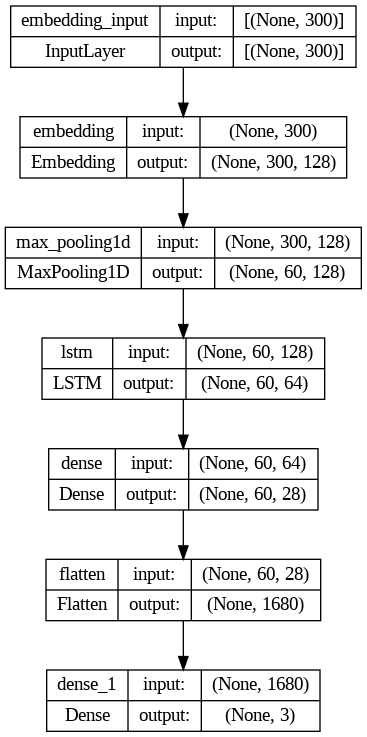

In [56]:
tf.keras.utils.plot_model(model, show_shapes=True)

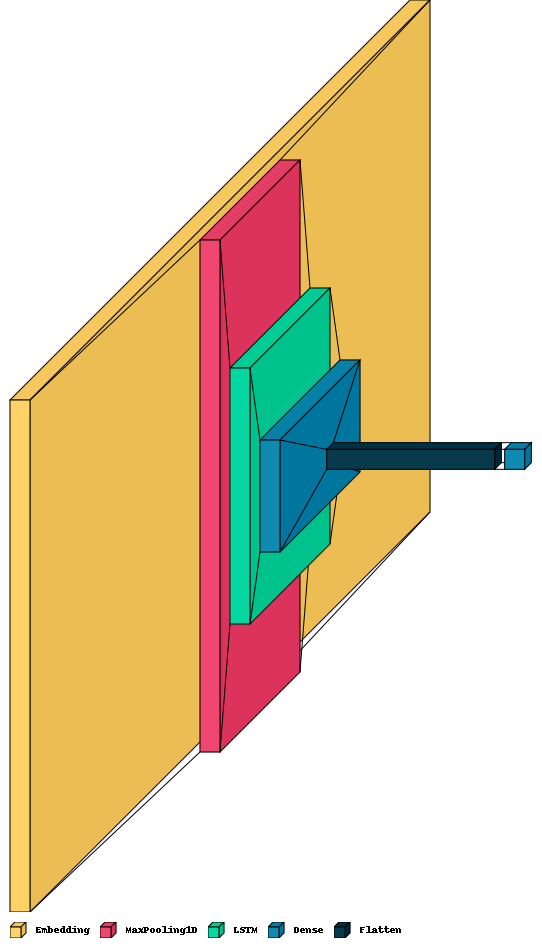

In [57]:
visualkeras.layered_view(model, legend=True)

In [58]:
import nltk
import string
import numpy as np
import pandas as pd
from nltk.corpus import stopwords

from sklearn.manifold import TSNE

In [59]:
score = model.evaluate(X_train, y_train,batch_size=64, verbose=2)
print('Train loss:', score[0])
print('Train accuracy:', score[1])

256/256 - 1s - loss: 0.0147 - accuracy: 0.9918 - 937ms/epoch - 4ms/step
Train loss: 0.014664729125797749
Train accuracy: 0.9917567372322083


In [60]:
score = model.evaluate(X_test, y_test,batch_size=64, verbose=2)
print('Test loss:', score[0])
acc=score[1]
print('Test accuracy:', acc)


80/80 - 0s - loss: 3.6767 - accuracy: 0.5889 - 313ms/epoch - 4ms/step
Test loss: 3.6766855716705322
Test accuracy: 0.588901937007904


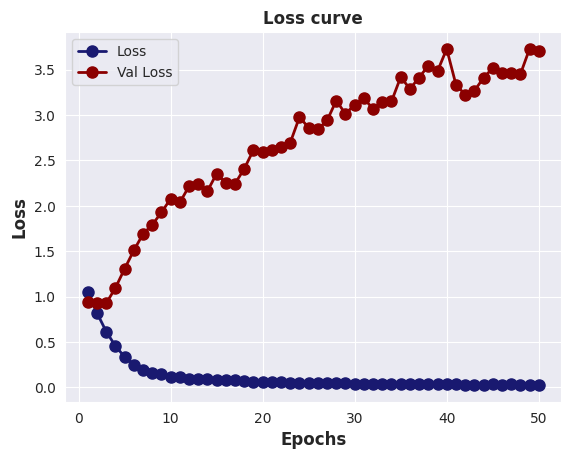

In [61]:
loss_values = history.history['loss']
val_loss_values = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(acc) + 1)
sns.set_style('darkgrid')


plt.plot(epochs, loss_values, color='midnightblue', linewidth = 2,
          marker='o', markersize=8,label='Training Accuracy')
plt.plot(epochs, val_loss_values, color='darkred', linewidth = 2,
          marker='o', markersize=8,label='Training Accuracy')
plt.title('Loss curve',fontsize=12,fontweight='bold')
plt.xlabel('Epochs',fontsize=12,fontweight='bold')
plt.ylabel('Loss',fontsize=12,fontweight='bold')
plt.legend(['Loss','Val Loss'])


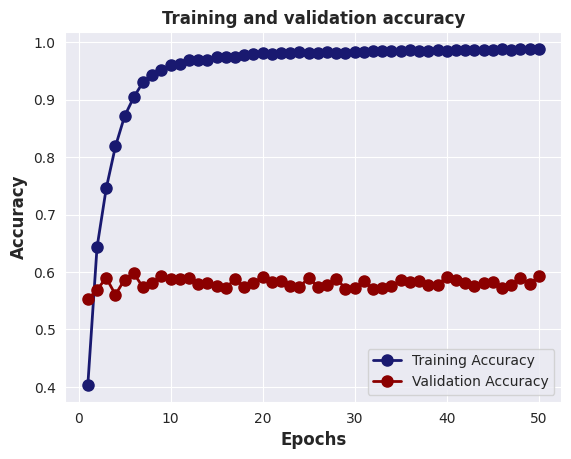

In [62]:
plt.plot(epochs, acc, color='midnightblue', linewidth = 2,
          marker='o', markersize=8,label='Training Accuracy')
plt.plot(epochs, val_acc, color='darkred', linewidth = 2,
          marker='o', markersize=8,label='Training Accuracy')
plt.title('Training and validation accuracy',fontsize=12,fontweight='bold')
plt.xlabel('Epochs',fontsize=12,fontweight='bold')
plt.ylabel('Accuracy',fontsize=12,fontweight='bold')
plt.legend(['Training Accuracy','Validation Accuracy'])

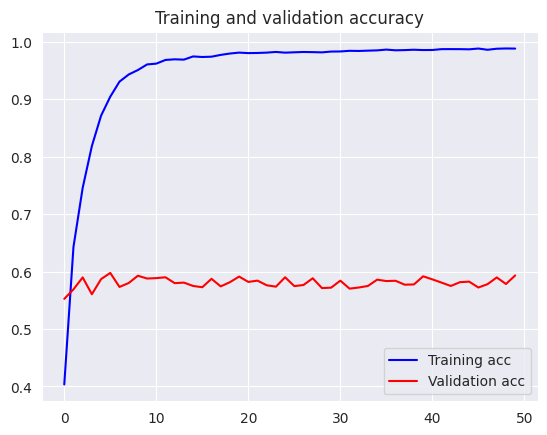

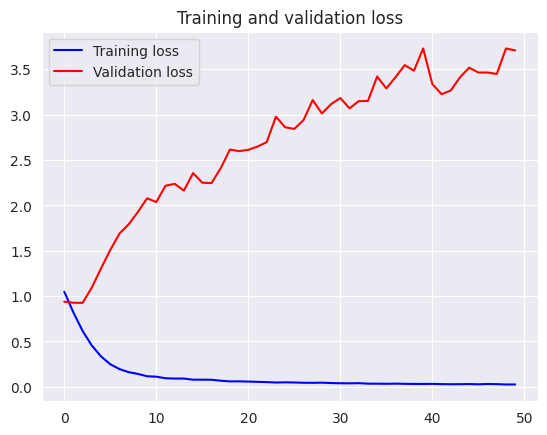

In [63]:
acc,  val_acc  = history.history['accuracy'], history.history['val_accuracy']
loss, val_loss = history.history['loss'], history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [64]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((16377, 300), (16377,), (5118, 300), (5118,))

160/160 [==============================] - 1s 4ms/step


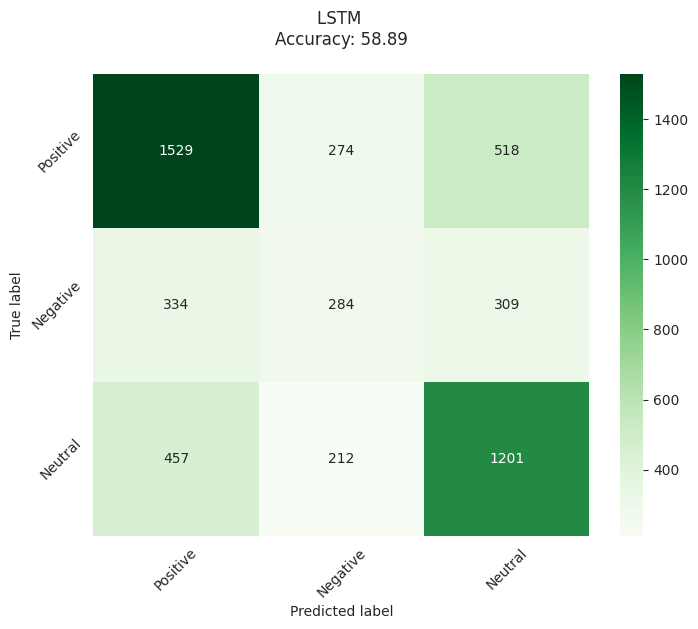

In [65]:
from sklearn.metrics import classification_report, confusion_matrix
predictions = model.predict(X_test)
y_pred = np.argmax(predictions, axis=1)

cm = confusion_matrix(y_test, y_pred)

class_names = ["Positive","Negative","Neutral"]
# Transform to df for easier plotting
cm_df = pd.DataFrame(cm,index = class_names,columns = class_names)

plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True,cmap="Greens", fmt='g')
plt.title('LSTM \nAccuracy: {0:.2f}\n'.format(accuracy_score(y_test, y_pred)*100))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()

In [66]:
report = pd.DataFrame(classification_report(y_test, y_pred,output_dict=True)).transpose()

In [67]:
report = report.rename(index={'0': 'Positive','1':'Negative','2':'Neutral'})
report[['precision','recall','f1-score']]=report[['precision','recall','f1-score']].apply(lambda x: round(x*100,2))
report

,precision,recall,f1-score,support
Positive,65.91,65.88,65.89,2321.000000
Negative,36.88,30.64,33.47,927.000000
Neutral,59.22,64.22,61.62,1870.000000
accuracy,58.89,58.89,58.89,0.588902
macro avg,54.00,53.58,53.66,5118.000000
weighted avg,58.21,58.89,58.46,5118.000000


In [68]:
sample_comment = 'চুয়াডাঙ্গা বাড়ি কে বলেছে আপনার'
cleaned_comment = process_conversations(sample_comment)

class_names = ["Negative","Positive","Neutral"]

# load the saved tokenizer
with open(file_path+'tokenizer.pickle', 'rb') as handle:
    loaded_tokenizer = pickle.load(handle)
#print(len(loaded_tokenizer.word_index))
seq= loaded_tokenizer.texts_to_sequences([cleaned_comment])
padded = pad(seq, value=0.0,padding='post', maxlen= 300 )
pred = model.predict(padded)
#print(pred)
class_names[np.argmax(pred)]

1/1 [==============================] - 0s 36ms/step


'Negative'

In [69]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, LSTM, Dense

# max_features = max_fatures # Set the maximum number of features
# embed_dim = 64
# filters = 128
# kernel_size = 5

# model = Sequential()
# model.add(Embedding(max_features, embed_dim, input_length=X.shape[1]))
# model.add(Conv1D(filters, kernel_size, activation='relu'))
# model.add(MaxPooling1D())
# model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.4))
# model.add(Dense(256, activation='softmax'))
# model.add(Dense(2, activation='sigmoid'))
# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# model.summary()


In [70]:
# Assuming you have already trained the model using the provided code

# Save the trained model to a file
model.save('/content/drive/MyDrive/Research Work/EMNLP/Output/LSTMmodel.h5')

In [71]:
model = tf.keras.models.load_model('/content/drive/MyDrive/Research Work/EMNLP/Output/LSTMmodel.h5')

In [72]:
new_data = pd.read_csv('/content/drive/MyDrive/Research Work/EMNLP/Dataset2/blp23_sentiment_dev_test.csv')

In [73]:
new_data.head()

,id,text
0,30670,* করোনায় আরো ১৮৭ জনের মৃত্যু; মোট প্রাণহানি ...
1,4125,চাপাবাজীর চাপে এবার ধামাচাপা পড়বে আসল ইসু
2,27077,কুয়েতে বাংলাদেশী ফল খেতে হামলে পড়ছেন প্রবাসীরা
3,17552,তিনি ছিলেন টেস্ট খেলা সবচেয়ে বেশি বয়সী জীবিত...
4,4137,চাল আর পাট গুলো উৎপাদন করতে যে কৃষকের বাঁশ ঢুক...


In [74]:
# After training your model
model.save('/content/drive/MyDrive/Research Work/EMNLP/Output')  # Specify the path where you want to save the model

In [75]:
model = tf.keras.models.load_model('/content/drive/MyDrive/Research Work/EMNLP/Output/LSTMmodel.h5')  # Specify the correct path

with open(file_path+'tokenizer.pickle', 'rb') as handle:
    loaded_tokenizer = pickle.load(handle)


In [76]:
new_data="/content/drive/MyDrive/Research Work/EMNLP/TSV to CSV/blp23_sentiment_test.tsv"
new_data = pd.read_csv(new_data, sep='\t')

In [77]:
new_data.head()

,id,text
0,7135,মুখস্ত শিক্ষা দিয়ে কি করবে এই জাতি ? বাংলাদেশ...
1,28949,জর্ডানের সাবেক যুবরাজ প্রিন্স হামজার ভিডিও বার...
2,10210,আমার ছেলের দুর্ভাগ্য না সৌভাগ্য জানিনা জ্বর এর...
3,9526,Pranoy Sen তখন পাকিস্তান ও আফগানিস্তান ভারতের ...
4,2142,আরো কত মিথ্যাচার করবে


In [78]:
new_data['text'] = new_data['text'].apply(process_conversations)

In [79]:

# Convert text to sequences and pad
sequences = loaded_tokenizer.texts_to_sequences(new_data['text'])
padded_sequences = pad_sequences(sequences, value=0.0, padding='post', maxlen=300)

# Generate predictions
predictions = model.predict(padded_sequences)

# Get predicted classes
predicted_classes = [np.argmax(pred) for pred in predictions]

# Map predicted class indices to class names
class_names = ["Negative", "Positive", "Neutral"]
predicted_class_names = [class_names[index] for index in predicted_classes]

# Add predicted column to the DataFrame
new_data['predicted'] = predicted_class_names


210/210 [==============================] - 1s 5ms/step


In [80]:
new_data.head()

,id,text,predicted
0,7135,মুখস্ত শিক্ষা জাতি বাংলাদেশ শিক্ষার সার্টিফি...,Negative
1,28949,জর্ডানের সাবেক যুবরাজ প্রিন্স হামজার ভিডিও বার...,Neutral
2,10210,ছেলের দুর্ভাগ্য সৌভাগ্য জানিনা জ্বর স্কুল পারে...,Positive
3,9526,পাকিস্তান আফগানিস্তান ভারতের হয়ে,Positive
4,2142,আরো মিথ্যাচার,Negative


In [81]:
new_data.drop("text",axis=1,inplace=True)

In [82]:
import pandas as pd

# Assuming you have the DataFrame 'test_df' with the added 'predicted' column
output_xlsx_path = '/content/drive/MyDrive/Research Work/EMNLP/Output/path_to_predicted_result.xlsx'  # Specify the correct path and filename

# Save the DataFrame to an Excel file
new_data.to_excel(output_xlsx_path, index=False)


In [83]:
import pandas as pd

# Assuming you have the DataFrame 'new_data' with the added 'predicted' column
output_tsv_path = '/content/drive/MyDrive/Research Work/EMNLP/Output/path_to_predicted_result.tsv'  # Specify the correct path and filename

# Save the DataFrame to a TSV file
new_data.to_csv(output_tsv_path, sep='\t', index=False)